# Financial Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

k=KNeighborsClassifier()
d=DecisionTreeClassifier()
r=RandomForestClassifier()
l=LogisticRegression()
mb=MultinomialNB()
    
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("data.csv")#https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis

In [3]:
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [4]:
df["Sentence"][0]

"The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model ."

In [5]:
df["Sentiment"].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

In [6]:
df["Sentence"]=df["Sentence"].str.lower() #We convert our texts to lowercase.
df["Sentence"]=df["Sentence"].str.replace("[^\w\s]","") #We remove punctuation marks from our texts.
df["Sentence"]=df["Sentence"].str.replace("\d+","") #We are removing numbers from our texts.
df["Sentence"]=df["Sentence"].str.replace("\n","").replace("\r","") #We remove spaces in our texts.
df_neutral=df[df['Sentiment']=="neutral"]
df_positive=df[df['Sentiment']=="positive"]
df_negative=df[df['Sentiment']=="negative"]
df["Sentiment"]=df["Sentiment"].map({"positive":1,"negative":0,"neutral":2})
df['Sentiment']=df['Sentiment'].astype(int)
df1=df[df['Sentiment']!=2]
#We replace negative texts with 0 and positive texts with 1.

In [7]:
vect=CountVectorizer(lowercase=True,stop_words="english")
x=df1.Sentence
y=df1.Sentiment
x=vect.fit_transform(x)

In [8]:
def sentiment_classification_funct(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)
    
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
    
    k=KNeighborsClassifier()
    d=DecisionTreeClassifier()
    r=RandomForestClassifier()
    l=LogisticRegression()
    mb=MultinomialNB()
    
    algos=[k,d,r,l,mb]
    algo_names=['KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','MultinomialNB']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
        
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result.f1_score=f1_scored
    result.recall_score=recall_scored
    result.precision_score=precision_scored
    result.accuracy_score=accuracy_scored
    sentiment_classification_funct.result=result.sort_values('f1_score',ascending=False)
    return result.sort_values('f1_score',ascending=False)

In [9]:
sentiment_classification_funct(x,y)

(2169, 6598) (543, 6598) (2169,) (543,)


,f1_score,recall_score,precision_score,accuracy_score
RandomForestClassifier,0.877451,0.952128,0.813636,0.815838
LogisticRegression,0.872818,0.930851,0.821596,0.812155
MultinomialNB,0.864430,0.856383,0.872629,0.813996
DecisionTreeClassifier,0.837451,0.856383,0.819338,0.769797
KNeighborsClassifier,0.825359,0.917553,0.750000,0.731123


In [10]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("Stock Market.png"))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(" ".join(data))
    plt.imshow(wc)
    plt.axis("off")
#We draw the most used words in tweets on a picture.

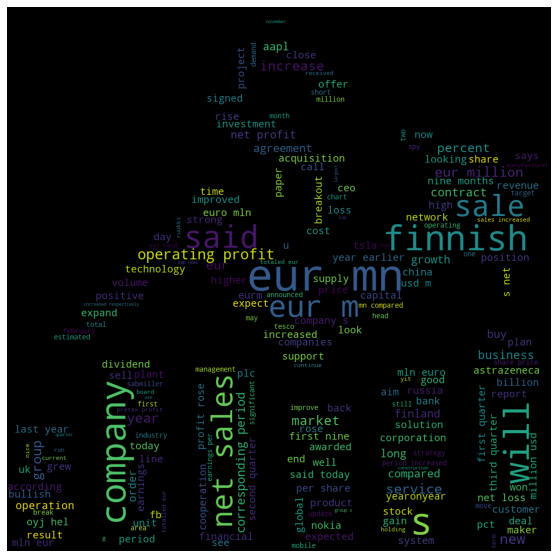

In [14]:
wc(df_positive.Sentence,"black")##Positive

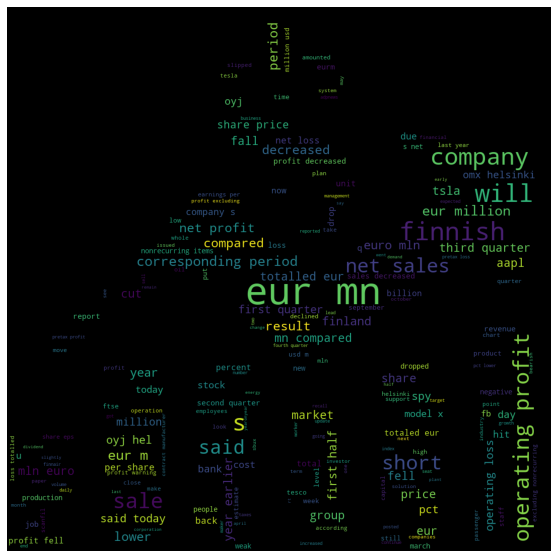

In [15]:
wc(df_negative.Sentence,"black")##Negative

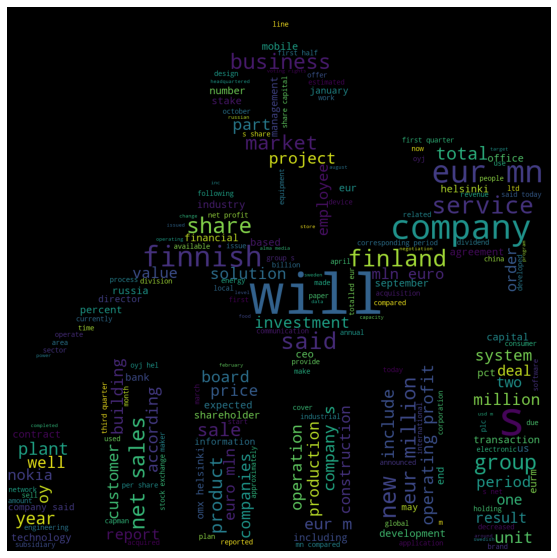

In [16]:
wc(df_neutral.Sentence,"black")##Neutral

In [17]:
sent=df[["Sentence","Sentiment"]]

In [18]:
def detect_sentiment(Sentence):
    return TextBlob(Sentence).sentiment.polarity
#We are doing our sentiment analysis.

In [20]:
sent["sentiment_analysis"]=sent["Sentence"].apply(detect_sentiment)
sent.head()

,Sentence,Sentiment,sentiment_analysis
0,the geosolutions technology will leverage bene...,1,0.209091
1,esi on lows down to bk a real possibility,0,0.022222
2,for the last quarter of componenta s net sal...,1,0.000000
3,according to the finnishrussian chamber of com...,2,0.062500
4,the swedish buyout firm has sold its remaining...,2,-0.100000


In [21]:
def sentiment2(sent):
    if (sent< -0.02):
        return 3
    elif sent>0.02:
        return 1
    else:
        return 0
#We divide the texts into three groups positive, negative and nötr.

In [22]:
sent["sent"]=sent["sentiment_analysis"].apply(sentiment2)
sent.head()

,Sentence,Sentiment,sentiment_analysis,sent
0,the geosolutions technology will leverage bene...,1,0.209091,1
1,esi on lows down to bk a real possibility,0,0.022222,1
2,for the last quarter of componenta s net sal...,1,0.000000,0
3,according to the finnishrussian chamber of com...,2,0.062500,1
4,the swedish buyout firm has sold its remaining...,2,-0.100000,3


In [24]:
sent.sentiment_analysis.value_counts()

 0.000000    2983
 0.100000     123
 0.250000     111
 0.136364     104
-0.200000      98
             ... 
 0.404167       1
 0.155682       1
 0.033333       1
-0.005556       1
-0.011905       1
Name: sentiment_analysis, Length: 541, dtype: int64